Program for [BlockOut Probability](https://ieeexplore.ieee.org/document/6708475) calculation as described in:  
Á. A. M. de Medeiros and M. D. Yacoub, "BlockOut: Blocking and Outage in a Single Performance Measure," in IEEE Transactions on Vehicular Technology, vol. 63, no. 7, pp. 3451-3456, Sept. 2014, doi: 10.1109/TVT.2014.2299438.

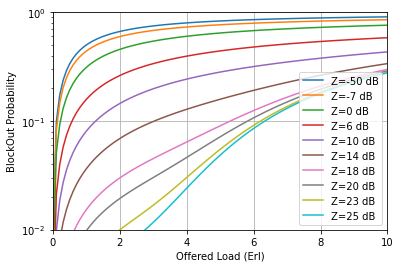

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Function that calculates the outage (interference) probability in a Rayleigh 
# propagation environment given the quantity of interferers N, and the 
# interference margin Z in dB 
def outProbRayleigh(N,Z):
    return 1-np.power((np.power(10,Z/10)/(1+np.power(10,Z/10))),N)

# Function that calculates the BlockOut probability given offered load A in Erl,
# number of states N (resources), and the interference margin Z at call arrival in dB

def blockOutProb(A,N,Z):
    interferers = np.arange(N-1) #array of interferers
    states = np.arange(1,N) #array of states of Markov chain
    outProb = np.ones(N-1)-outProbRayleigh(interferers,Z)  #array of outage probabilties for each state
    prodOutage = np.cumprod(outProb) #array of productory of outage probabilities
    stateProb = np.power(A,states)*prodOutage/factorial(states,exact=True)
    sumProb = np.array([stateProb.sum()+1])
    stateProb = stateProb/sumProb # array of state probabilities
    expValueState = np.dot(states,stateProb) # Expected value of states
    # return the blockOut probability
    return 1 - expValueState/A
    

#Programm inputs    
 

# Offered Load in Erlangs
A = np.arange(start=0.01, stop=11, step=0.1) 
sA = A.shape[0] 


# Interference Margin in dB
Z = np.array([ -50, -7, 0, 6, 10, 14, 18, 20, 23, 25, 50])
sZ = Z.shape[0] 

# Number of resources
N = 10

# Vector of BlockOut probabilities in function of offered load
p = np.zeros(shape = sA)

#Table with final result
#finalTable = A
#for l in range(0,sZ-1):
#    for k in range(0,sA-1):
#        p[k]=np.power(A[k],Z[l])
#    finalTable = np.vstack((finalTable, p))



#Ploting BlockOut versus Offered Load
plt.xlabel('Offered Load (Erl)')
plt.ylabel('BlockOut Probability')
plt.grid(True)
plt.xlim([0,10])
plt.ylim([0.01,1])

for l in range(0,sZ-1):
    for k in range(0,sA-1):
        p[k] = blockOutProb(A[k],N,Z[l])
    plt.semilogy(A, p, label='Z=%d dB' %Z[l])  


    
plt.legend()



